In [29]:
from __future__ import division
import pandas as pd
import numpy as np
from sklearn import preprocessing, cross_validation, svm, metrics, tree, decomposition, svm
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier, OrthogonalMatchingPursuit, RandomizedLogisticRegression
from sklearn.neighbors.nearest_centroid import NearestCentroid
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import ParameterGrid
from sklearn.metrics import *
from sklearn.preprocessing import StandardScaler
import random
import pylab as pl
import matplotlib.pyplot as plt
from scipy import optimize
import time

%matplotlib inline

In [41]:
#df = pd.read_csv("../cs-training.csv")
#features  =  ['RevolvingUtilizationOfUnsecuredLines', 'DebtRatio', 'age', 'NumberOfTimes90DaysLate']
#X=df[features]
#Y=df.SeriousDlqin2yrs

from sklearn.datasets import make_classification
X, Y = make_classification(n_samples= 10000, n_features=50, n_redundant=10, n_informative=10,
                           random_state=1, n_clusters_per_class=3, n_repeated = 10)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [42]:
# Random Logits
num_logits = 100
num_features = 10
clf = BaggingClassifier(base_estimator = LogisticRegression(),n_estimators=num_logits, max_features = num_features)
clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
         bootstrap=True, bootstrap_features=False, max_features=10,
         max_samples=1.0, n_estimators=100, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [43]:
# print feature importances and feature indices

for logit in clf.estimators_:
    print (logit.coef_)
    
for logit in clf.estimators_features_:
    print (logit)

[[ 0.04278096 -0.00578652 -0.01017553 -0.02281742 -0.20245823  0.16022224
  -0.60743226 -0.01291772  0.09587972  0.02940175]]
[[ 0.19867037  0.00365484  0.11324191  0.01428902 -0.75069472  0.15925832
  -0.31049588 -0.02868333 -0.05278228  0.0088661 ]]
[[ 0.41735341 -0.01232889  0.18943078  0.02075197 -0.51375111  0.01725254
  -0.05904185  0.01400404 -0.04423286  0.13351217]]
[[-0.00681096  0.02471828 -0.02891005  0.04197511  0.00467625  0.01470153
  -0.16071556  0.02632712  0.04197511 -0.17619635]]
[[-0.05491683 -0.21087401  0.04566719  0.05007382  0.04864151  0.04058058
  -0.05345434 -0.05491683 -0.02261277 -0.11107564]]
[[-0.23692376 -0.00765901 -0.02555747  0.05110785  0.10057303 -0.06065608
   0.32305135  0.36770106 -0.06110821  0.02367812]]
[[ -3.72472288e-02  -1.45730507e-01   6.25315527e-05  -7.58405466e-02
   -4.80621001e-01  -8.17792487e-02   3.17325032e-01  -1.59055807e-01
    6.02149524e-02  -8.05124560e-02]]
[[ 0.00296056 -0.02394753 -0.02926485 -0.02062963  0.00296056 -0.0

In [44]:
total_features = X.shape[1]
feature_importance_matrix = np.zeros((num_logits, total_features))
row = 0
for feature in clf.estimators_features_:
    for i in range(num_features):
        feature_importance_matrix[row][feature[i]] = clf.estimators_[row].coef_[0][i] 
    row += 1
feature_importance_matrix[feature_importance_matrix==0]=['nan']
#print feature_importance_matrix
mean_importance_rl = np.nanmean(feature_importance_matrix, dtype=np.float64, axis=0)
std_importance_rl = np.nanstd(feature_importance_matrix, dtype=np.float64,axis=0)

#print "mean is ", np.nanmean(feature_importance_matrix, dtype=np.float64, axis=0)
#print "stdev is ", np.nanstd(feature_importance_matrix, dtype=np.float64,axis=0)


In [45]:
# let's compare it to RFs

clfrf = RandomForestClassifier(n_estimators= num_logits, max_features = num_features, n_jobs=-1)
clfrf.fit(X_train, y_train)
clfrf.feature_importances_

array([ 0.02032786,  0.00498284,  0.02718975,  0.03192276,  0.01747369,
        0.03549338,  0.0060538 ,  0.01846419,  0.01448771,  0.00544239,
        0.01440718,  0.02569984,  0.0321947 ,  0.02143058,  0.00539424,
        0.00505567,  0.00490256,  0.0233178 ,  0.01234735,  0.00573081,
        0.00519592,  0.01626586,  0.02745938,  0.00602877,  0.11122157,
        0.01827348,  0.01771449,  0.00478705,  0.04098284,  0.03130653,
        0.00476087,  0.00519855,  0.00574573,  0.00530679,  0.02022378,
        0.02247705,  0.01354928,  0.03683765,  0.02495892,  0.02695928,
        0.02056202,  0.02289156,  0.0050349 ,  0.04373704,  0.10462488,
        0.00485064,  0.00479475,  0.00544895,  0.00521547,  0.00526691])

In [46]:
def plot_feature_importance(mean_importance_array, std_importance_array, indices, label):
    # Print the feature ranking
    print("Ranking:")

    for f in range(X.shape[1]):
        print("%d. feature %d (%f)" % (f + 1, indices[f], mean_importance_array[indices[f]]))

    # Plot the feature importances of the forest
    plt.figure()
    plt.title(label)
    plt.bar(range(X.shape[1]), mean_importance_array[indices],
            color="r", yerr=std_importance_array[indices], align="center")
    plt.xticks(range(X.shape[1]), indices)
    plt.xlim([-1, X.shape[1]])
    plt.show()

Ranking:
1. feature 24 (-0.591213)
2. feature 38 (-0.350611)
3. feature 39 (-0.292057)
4. feature 44 (0.268636)
5. feature 35 (-0.245507)
6. feature 40 (-0.204930)
7. feature 3 (0.201229)
8. feature 2 (-0.199496)
9. feature 34 (0.195541)
10. feature 10 (-0.192717)
11. feature 0 (0.182380)
12. feature 41 (-0.175330)
13. feature 28 (0.175025)
14. feature 22 (-0.173085)
15. feature 7 (0.151808)
16. feature 25 (0.149205)
17. feature 29 (0.131977)
18. feature 5 (0.104747)
19. feature 8 (-0.104499)
20. feature 18 (0.095518)
21. feature 36 (0.093499)
22. feature 11 (0.086842)
23. feature 37 (-0.073288)
24. feature 4 (0.067556)
25. feature 26 (-0.065795)
26. feature 17 (-0.059914)
27. feature 42 (0.059567)
28. feature 13 (0.051622)
29. feature 20 (-0.038995)
30. feature 47 (-0.034870)
31. feature 19 (-0.031931)
32. feature 33 (-0.031458)
33. feature 1 (-0.031230)
34. feature 46 (-0.027303)
35. feature 23 (-0.025434)
36. feature 48 (-0.025162)
37. feature 14 (-0.022882)
38. feature 16 (-0.02089

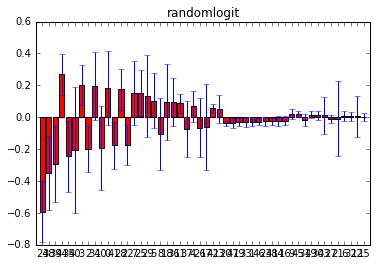

Ranking:
1. feature 24 (0.111222)
2. feature 44 (0.104625)
3. feature 43 (0.043737)
4. feature 28 (0.040983)
5. feature 37 (0.036838)
6. feature 5 (0.035493)
7. feature 12 (0.032195)
8. feature 3 (0.031923)
9. feature 29 (0.031307)
10. feature 22 (0.027459)
11. feature 2 (0.027190)
12. feature 39 (0.026959)
13. feature 11 (0.025700)
14. feature 38 (0.024959)
15. feature 17 (0.023318)
16. feature 41 (0.022892)
17. feature 35 (0.022477)
18. feature 13 (0.021431)
19. feature 40 (0.020562)
20. feature 0 (0.020328)
21. feature 34 (0.020224)
22. feature 7 (0.018464)
23. feature 25 (0.018273)
24. feature 26 (0.017714)
25. feature 4 (0.017474)
26. feature 21 (0.016266)
27. feature 8 (0.014488)
28. feature 10 (0.014407)
29. feature 36 (0.013549)
30. feature 18 (0.012347)
31. feature 6 (0.006054)
32. feature 23 (0.006029)
33. feature 32 (0.005746)
34. feature 19 (0.005731)
35. feature 47 (0.005449)
36. feature 9 (0.005442)
37. feature 14 (0.005394)
38. feature 33 (0.005307)
39. feature 49 (0.005

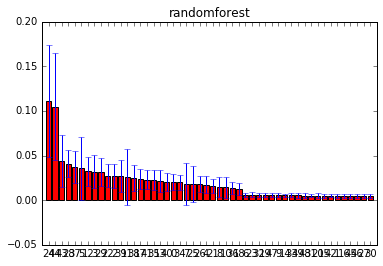

In [47]:
indices_rl = np.argsort(np.abs(mean_importance_rl))[::-1]
# std_important_rl is buggy but will fix it later
plot_feature_importance(mean_importance_rl, std_importance_rl, indices_rl, "randomlogit")

importance_rf = clfrf.feature_importances_
std_importance_rf = np.std([tree.feature_importances_ for tree in clfrf.estimators_],
             axis=0)
indices_rf = np.argsort(importance_rf)[::-1]
plot_feature_importance(importance_rf, std_importance_rf, indices_rf, "randomforest")
